In [1]:
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import json, ast
import itertools
from numpy import array
from numpy import *
from __future__ import division
from mpl_toolkits.mplot3d import Axes3D
import sqlite3

Import Bill Info
==
- average voting stats for each congressperson
- and amount of times each congressperson has voted

In [3]:
# because the dataframes were created as groups the id's have a lot of NA's
# Since it was grouped data we can do ffill (fill from cell above)
bill_votes_means = pd.read_excel("/Users/Alexanderhubbard/Desktop/final_porject_data/all_bills/grouped_clean_voting_data_mean.xlsx")
bill_votes_means = bill_votes_means.fillna(method='ffill')

In [4]:
bill_votes_means.tail()

,id,party,state,subjects_top_terms,yea,no,not voting
39228,Z000008,R,NJ,"Science, technology, communications",0.833333,0.166667,0.000000
39229,Z000008,R,NJ,Social welfare,0.750000,0.250000,0.000000
39230,Z000008,R,NJ,Taxation,0.700000,0.300000,0.000000
39231,Z000008,R,NJ,Transportation and public works,0.607143,0.357143,0.035714
39232,Z000008,R,NJ,Water resources development,0.500000,0.500000,0.000000


In [5]:
# because the dataframes were created as groups the id's have a lot of NA's
# Since it was grouped data we can do ffill (fill from cell above)
bill_votes_sums = pd.read_excel("/Users/Alexanderhubbard/Desktop/final_porject_data/all_bills/grouped_clean_voting_data_sum.xlsx")
bill_votes_sums = bill_votes_sums.fillna(method='ffill')

In [6]:
bill_votes_sums.tail()

,id,party,state,subjects_top_terms,yea,no,not voting
39228,Z000008,R,NJ,"Science, technology, communications",5,1,0
39229,Z000008,R,NJ,Social welfare,3,1,0
39230,Z000008,R,NJ,Taxation,7,3,0
39231,Z000008,R,NJ,Transportation and public works,17,10,1
39232,Z000008,R,NJ,Water resources development,2,2,0


Lets try it for everyone and 'Armed forces and national security' bills!
==

In [7]:
# shrink the mean voting data to only relevant info
all_congress_plot_means = bill_votes_means[bill_votes_means['subjects_top_terms'] == 
                                             'Armed forces and national security'][['subjects_top_terms',
                                                                                    'yea', 'no', 'id', 'party', 'state']]
# since data was removed the indexes need to be reset
all_congress_plot_means = all_congress_plot_means.reset_index(drop=True)

# construct a master dataframe 
# I should have done sums first so I didn't replace 'yea'
# but it's whatever
all_congress_plot = all_congress_plot_means
# attach the percent times a congressperson votes yes to the master dataframe
all_congress_plot['average_yea_vote'] = all_congress_plot['yea']
all_congress_plot['average_no_vote'] = all_congress_plot['no']
all_congress_plot.tail()

,subjects_top_terms,yea,no,id,party,state,average_yea_vote,average_no_vote
1196,Armed forces and national security,0.807229,0.120482,Y000062,D,KY,0.807229,0.120482
1197,Armed forces and national security,0.937500,0.062500,Y000063,R,KS,0.937500,0.062500
1198,Armed forces and national security,0.937500,0.062500,Y000064,R,IN,0.937500,0.062500
1199,Armed forces and national security,0.500000,0.466667,Z000004,R,NH,0.500000,0.466667
1200,Armed forces and national security,0.466667,0.500000,Z000008,R,NJ,0.466667,0.500000


In [8]:
# shrink the sum voting data to only relevant info
all_congress_plot_sums = bill_votes_sums[bill_votes_sums['subjects_top_terms'] == 
                                           'Armed forces and national security'][['subjects_top_terms', 'yea', 'no', 'id']]

# since data was removed the indexes need to be reset
all_congress_plot_sums = all_congress_plot_sums.reset_index(drop=True)
# attach the total times a congressperson votes yesto the master dataframe
all_congress_plot['yea'] = all_congress_plot_sums['yea']
all_congress_plot['no'] = all_congress_plot_sums['no']
all_congress_plot.tail()

,subjects_top_terms,yea,no,id,party,state,average_yea_vote,average_no_vote
1196,Armed forces and national security,67,10,Y000062,D,KY,0.807229,0.120482
1197,Armed forces and national security,15,1,Y000063,R,KS,0.937500,0.062500
1198,Armed forces and national security,15,1,Y000064,R,IN,0.937500,0.062500
1199,Armed forces and national security,15,14,Z000004,R,NH,0.500000,0.466667
1200,Armed forces and national security,14,15,Z000008,R,NJ,0.466667,0.500000


Plot Plot Plot!
==
Plot total yes votes by average votes for each congressperson and color code their political party

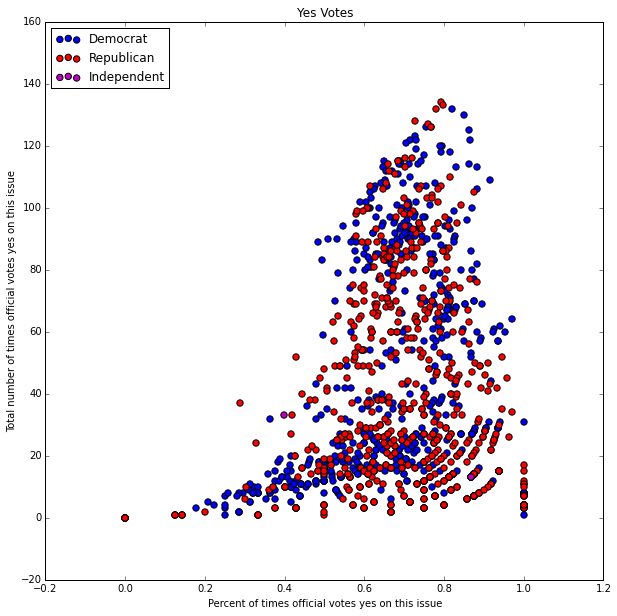

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(x=all_congress_plot[all_congress_plot['party'] == 'D']['average_yea_vote'], 
           y=all_congress_plot[all_congress_plot['party'] == 'D']['yea'],
          c='b', label='Democrat', s=40)
ax.scatter(x=all_congress_plot[all_congress_plot['party'] == 'R']['average_yea_vote'], 
           y=all_congress_plot[all_congress_plot['party'] == 'R']['yea'],
          c='r', label='Republican', s=40)
ax.scatter(x=all_congress_plot[all_congress_plot['party'] == 'I']['average_yea_vote'], 
           y=all_congress_plot[all_congress_plot['party'] == 'I']['yea'],
          c='m', label='Independent', s=40)
plt.legend(loc='upper left')
plt.title("Yes Votes")
plt.xlabel('Percent of times official votes yes on this issue')
plt.ylabel('Total number of times official votes yes on this issue')
plt.show();

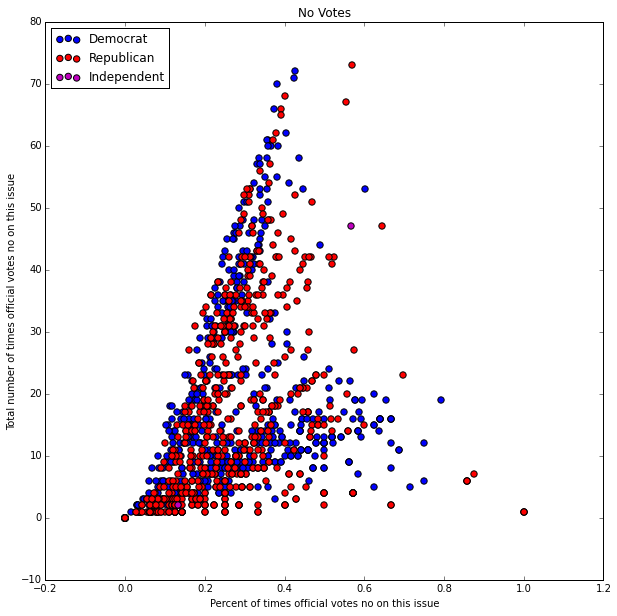

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(x=all_congress_plot[all_congress_plot['party'] == 'D']['average_no_vote'], 
           y=all_congress_plot[all_congress_plot['party'] == 'D']['no'],
          c='b', label='Democrat', s=40)
ax.scatter(x=all_congress_plot[all_congress_plot['party'] == 'R']['average_no_vote'], 
           y=all_congress_plot[all_congress_plot['party'] == 'R']['no'],
          c='r', label='Republican', s=40)
ax.scatter(x=all_congress_plot[all_congress_plot['party'] == 'I']['average_no_vote'], 
           y=all_congress_plot[all_congress_plot['party'] == 'I']['no'],
          c='m', label='Independent', s=40)
plt.legend(loc='upper left')
plt.title("No Votes")
plt.xlabel('Percent of times official votes no on this issue')
plt.ylabel('Total number of times official votes no on this issue')
plt.show();

Can we have more features?
==

Yes we can. We can add total campain contributions from different industries and see how it affects political voting.

Here's the industries we will start with:
- CLERGY & RELIGIOUS ORGANIZATIONS
- CONSTRUCTION SERVICES
- DEFENSE AEROSPACE
- DEFENSE ELECTRONICS
- DEMOCRATIC LIBERAL
- FOREIGN & DEFENSE POLICY
- GENERAL CONTRACTORS
- GUN CONTROL
- GUN RIGHTS
- MISC DEFENSE
- OIL & GAS
- REPUBLICAN CONSERVATIVE

Add campaign contributions by industry
==

In [27]:
contribution_data = pd.read_csv('/Users/Alexanderhubbard/Desktop/master_contributions_of_interest.csv')

In [12]:
contribution_data = pd.read_csv('/Users/Alexanderhubbard/Desktop/exports/lean_contribution_of_interest_positive.csv')

In [13]:
contribution_data.head(2)

,id,cycle,amount,date,contributor_name,contributor_ext_id,contributor_category,organization_name,organization_ext_id,recipient_name,recipient_ext_id,recipient_party,recipient_state,recipient_state_held,district_held,seat,seat_held,seat_status,seat_result,contributor_industry
0,225377330,1998,1000,7/19/81,PRC Inc,C00216853,D3000,PRC Inc,C00216853,James L Oberstar (D),N00001806,D,MN,MN,MN-08,federal:house,federal:house,I,W,DEFENSE ELECTRONICS
1,208333165,1990,300,1/5/89,"BROMLEY, GEORGIA",a0000074949A,D2000,Northrop Corp,NaN,Dana Rohrabacher (R),N00007151,R,CA,CA,CA-42,federal:house,federal:house,I,W,DEFENSE AEROSPACE


In [14]:
print "There are {} unique contribution industries: {}".format(pd.DataFrame(np.unique(contribution_data['contributor_industry'])).shape[0],
                                                               str(np.unique(contribution_data['contributor_industry'])))

There are 10 unique contribution industries: ['CLERGY & RELIGIOUS ORGANIZATIONS' 'DEFENSE AEROSPACE'
 'DEFENSE ELECTRONICS' 'DEMOCRATIC LIBERAL' 'FOREIGN & DEFENSE POLICY'
 'GENERAL CONTRACTORS' 'GUN CONTROL' 'GUN RIGHTS' 'MISC DEFENSE'
 'OIL & GAS']


In [15]:
print "Unique congresspeople IDs: {}".format(pd.DataFrame(np.unique(contribution_data['recipient_ext_id'])).shape[0])

Unique congresspeople IDs: 691


Now we need to tie the congresspeople who voted for 'Armed forces and national security' bills with their contribution industries

In [20]:
contribution_data_grouped = contribution_data.groupby(['recipient_ext_id', 'contributor_industry']).sum()
contribution_data_grouped.tail()

id   cycle  amount
recipient_ext_id contributor_industry                                 
N00033474        FOREIGN & DEFENSE POLICY  35269185795  191140    2995
                 GENERAL CONTRACTORS        1673211212    8054    5500
                 GUN RIGHTS                  371434047    2012     188
                 MISC DEFENSE               1980717627   10064    5750
                 OIL & GAS                   371144006    2012     500

Add contribution features:
==

In [21]:
## We need to update the all_congress_plot to include a unique id to track funding

# Import data to cross reference congress_id (bioguide_id) with fuding_id (opensecrets_id)
all_ids = pd.read_csv('/Users/Alexanderhubbard/Desktop/final_porject_data/all_ids/legislators_all_trancated_rep_only.csv')
all_ids = all_ids.drop('Unnamed: 0', 1)
all_ids.head(2)

,last_name,first_name,birthday,gender,type,state,bioguide_id,opensecrets_id
0,Aderholt,Robert,1965-07-22,M,rep,AL,A000055,N00003028
1,Amash,Justin,1980-04-18,M,rep,MI,A000367,N00031938


In [22]:
## Put congressperson's opensecrets_id and first and last name into all_congress_plot dataframe

# create columns and add 'NA' for placeholders
all_congress_plot['first_name'] = 'NA'
all_congress_plot['last_name'] = 'NA'
all_congress_plot['opensecrets_id'] = 'NA'

# create loop to cycle through all unique congresspeople's bioguide_ids
for i in range(all_congress_plot['id'].shape[0]):
    # because some people are missing data we will use the try/exception
    try: 
        # match up bioguide_ids and add appropriate information to all_congress_plot
        x_get_id_info = all_ids[all_ids['bioguide_id'] == all_congress_plot['id'][i]]
        x_get_id_info = x_get_id_info.reset_index(drop=True)
        all_congress_plot['first_name'][i] = x_get_id_info['first_name'][0]
        all_congress_plot['last_name'][i] = x_get_id_info['last_name'][0]
        all_congress_plot['opensecrets_id'][i] = x_get_id_info['opensecrets_id'][0]
    except IndexError:
        print "{} doesn't have info".format(str(all_congress_plot['id'][i]))
        all_congress_plot['first_name'][i] = 'NA'
        all_congress_plot['last_name'][i] = 'NA'
        all_congress_plot['opensecrets_id'][i] = 'NA'
        
all_congress_plot.head(2)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

A000069 doesn't have info
A000109 doesn't have info
A000121 doesn't have info
B000575 doesn't have info
B000711 doesn't have info
B000919 doesn't have info
B000944 doesn't have info
B000953 doesn't have info
B001066 doesn't have info
B001135 doesn't have info
B001230 doesn't have info
B001236 doesn't have info
C000077 doesn't have info
C000127 doesn't have info
C000141 doesn't have info
C000174 doesn't have info
C000286 doesn't have info
C000560 doesn't have info
C000858 doesn't have info
C000880 doesn't have info
C001047 doesn't have info
C001075 doesn't have info
D000294 doesn't have info
D000432 doesn't have info
D000563 doesn't have info
D000595 doesn't have info
D000607 doesn't have info
E000194 doesn't have info
F000444 doesn't have info
G000359 doesn't have info
G000367 doesn't have info
G000555 doesn't have info
G000562 doesn't have info
H001015 doesn't have info
H001041 doesn't have info
H001042 doesn't have info
H001046 doesn't have info
I000024 doesn't have info
I000055 does

,subjects_top_terms,yea,no,id,party,state,average_yea_vote,average_no_vote,first_name,last_name,opensecrets_id
0,Armed forces and national security,90,37,A000014,D,HI,0.681818,0.280303,Neil,Abercrombie,N00007665
1,Armed forces and national security,107,51,A000022,D,NY,0.625731,0.298246,Gary,Ackerman,N00001143


In [23]:
## Create dataframe for industries we want funding info on

# use the contribution_data to find all of the unique industries
# use unique industries for column names
column_names = np.unique(contribution_data['contributor_industry'])
column_names_test_to_append = pd.DataFrame(columns=column_names)
# append voting data with empty industry columns
# i.e. add columns for each unique industry
all_congress_plot_with_industries = pd.concat([all_congress_plot, column_names_test_to_append], axis=1)
all_congress_plot_with_industries.head(2)

,subjects_top_terms,yea,no,id,party,state,average_yea_vote,average_no_vote,first_name,last_name,...,CLERGY & RELIGIOUS ORGANIZATIONS,DEFENSE AEROSPACE,DEFENSE ELECTRONICS,DEMOCRATIC LIBERAL,FOREIGN & DEFENSE POLICY,GENERAL CONTRACTORS,GUN CONTROL,GUN RIGHTS,MISC DEFENSE,OIL & GAS
0,Armed forces and national security,90,37,A000014,D,HI,0.681818,0.280303,Neil,Abercrombie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Armed forces and national security,107,51,A000022,D,NY,0.625731,0.298246,Gary,Ackerman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
## Next make for loop to go get funding info for each congress person
## using the opensecret_id as the range

# change index in the grouped contribution data 
# now we can call the right index in the for loop
contribution_data_grouped_id_index = contribution_data_grouped.reset_index()

for unique_id in range(all_congress_plot_with_industries['opensecrets_id'].shape[0]):
    print '{} out of {}'.format(unique_id, all_congress_plot_with_industries['opensecrets_id'].shape[0])
    # make dataframe for all industries + contribution info that contributed to unique_id
    contribution_data_for_indiv = contribution_data_grouped_id_index[contribution_data_grouped_id_index['recipient_ext_id'] ==
                                            all_congress_plot_with_industries['opensecrets_id'][unique_id]]
    # since some people do not have an opensecret_id the contribution_data... will not have any data
    # to be more efficient an if statement will be used to only move forward when data exists
    if contribution_data_for_indiv.shape[0] > 0:
        # keep relevant information and transpose data for easier data calls
        contribution_info_by_industry = contribution_data_for_indiv.drop(['recipient_ext_id',
                                                                          'cycle','id'],1).set_index('contributor_industry').transpose()
        # great! Now that we have made it this far, we can finally add the funding data to our dataframe
        # These combined loops match up industry columns and add in the correct figures
        # j represents the industries (column names) that contributed to the person
        for j in range(pd.DataFrame(contribution_info_by_industry.columns).shape[0]):
            # i represents all of the possible industries (column names) that could be contributed to
            # j can be a miximum of i, and is usually less (because a person does not get contributions
            # from every industry)
            for i in range(pd.DataFrame(all_congress_plot_with_industries.columns).shape[0]):
                # if the person does get a contribution from an industry
                # then we will add it to our master data: all_congress_plot_with_industries
                if contribution_info_by_industry.columns[j] == all_congress_plot_with_industries.columns[i]:
                    # column_name_in_loop is the matching industries
                    column_name_in_loop = all_congress_plot_with_industries.columns[i]
                    # the all_congress_plot_with_industries must move with the initial for loop
                    all_congress_plot_with_industries[column_name_in_loop][unique_id] = contribution_info_by_industry[column_name_in_loop][0]

0 out of 1201
1 out of 1201
2 out of 1201
3 out of 1201
4 out of 1201
5 out of 1201
6 out of 1201
7 out of 1201
8 out of 1201
9 out of 1201
10 out of 1201
11 out of 1201
12 out of 1201
13 out of 1201
14 out of 1201
15 out of 1201
16 out of 1201
17 out of 1201
18 out of 1201
19 out of 1201
20 out of 1201
21 out of 1201
22 out of 1201
23 out of 1201
24 out of 1201
25 out of 1201
26 out of 1201
27 out of 1201
28 out of 1201
29 out of 1201
30 out of 1201
31 out of 1201
32 out of 1201
33 out of 1201
34 out of 1201
35 out of 1201
36 out of 1201
37 out of 1201
38 out of 1201
39 out of 1201
40 out of 1201
41 out of 1201
42 out of 1201
43 out of 1201
44 out of 1201
45 out of 1201
46 out of 1201
47 out of 1201
48 out of 1201
49 out of 1201
50 out of 1201
51 out of 1201
52 out of 1201
53 out of 1201
54 out of 1201
55 out of 1201
56 out of 1201
57 out of 1201
58 out of 1201
59 out of 1201
60 out of 1201
61 out of 1201
62 out of 1201
63 out of 1201
64 out of 1201
65 out of 1201
66 out of 1201
67 ou

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Clean Data!
==

In [28]:
all_congress_plot_with_industries.tail(4)

,subjects_top_terms,yea,no,id,party,state,average_yea_vote,average_no_vote,first_name,last_name,...,CLERGY & RELIGIOUS ORGANIZATIONS,DEFENSE AEROSPACE,DEFENSE ELECTRONICS,DEMOCRATIC LIBERAL,FOREIGN & DEFENSE POLICY,GENERAL CONTRACTORS,GUN CONTROL,GUN RIGHTS,MISC DEFENSE,OIL & GAS
1197,Armed forces and national security,15,1,Y000063,R,KS,0.937500,0.062500,Kevin,Yoder,...,NaN,15250,7750,NaN,7250,71771,NaN,24000,17000,124405
1198,Armed forces and national security,15,1,Y000064,R,IN,0.937500,0.062500,Todd,Young,...,10000,38000,18250,NaN,NaN,89835,NaN,20950,25000,96650
1199,Armed forces and national security,15,14,Z000004,R,NH,0.500000,0.466667,William,Zeliff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1200,Armed forces and national security,14,15,Z000008,R,NJ,0.466667,0.500000,Richard,Zimmer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


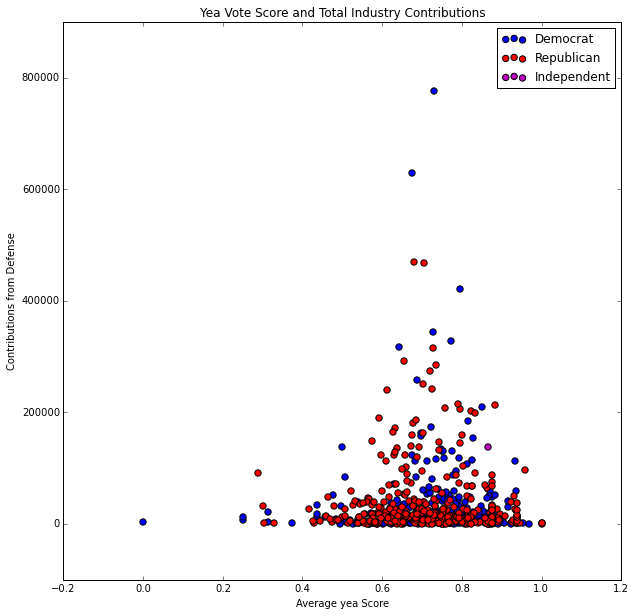

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

x = all_congress_plot_with_industries['average_yea_vote'] 
y = all_congress_plot_with_industries['MISC DEFENSE']

fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='black')
ax.scatter(x, y)


ax.scatter(x=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['average_yea_vote'], 
           y=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['MISC DEFENSE'],
          c='b', label='Democrat', s=40)
ax.scatter(x=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'R']['average_yea_vote'], 
           y=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'R']['MISC DEFENSE'],
          c='r', label='Republican', s=40)
ax.scatter(x=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'I']['average_yea_vote'], 
           y=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'I']['MISC DEFENSE'],
          c='m', label='Independent', s=40)
plt.legend(loc='upper right')
plt.title('Yea Vote Score and Total Industry Contributions')
plt.xlabel('Average yea Score')
plt.ylabel('Contributions from Defense')
plt.savefig('/Users/Alexanderhubbard/Desktop/sample_plot.png',dpi=200)
plt.show();

The code above attempted to draw a line of best fit, but failed. Additionally, this plot doesn't tell us much. Is vote probability the best metric to use?

Can we have even more features? / Is vote probability the best metric to use?
==

Yes, a good feature to add will be called the 'Industry Vote Score' feature.

Add a feature called 'Industy Vote Score'
==
yea votes = 1
no votes = -1
not voting = 0

This feature will similar to the probability of a congressional official voting yea for a bill. The idea is that the higher the 'Industry Vote Score' is, the more valuable that congressional official is for the industry.


In [144]:
all_congress_plot_with_industries['no_weighted'] = all_congress_plot_with_industries['no']*-1
all_congress_plot_with_industries['industry_votes_score'] = np.sum(all_congress_plot_with_industries[['yea',
                                                                                                             'no_weighted']], 1)
all_congress_plot_with_industries.head(2)

,subjects_top_terms,yea,no,id,party,state,average_yea_vote,average_no_vote,first_name,last_name,...,FOREIGN & DEFENSE POLICY,GENERAL CONTRACTORS,GUN CONTROL,GUN RIGHTS,MISC DEFENSE,OIL & GAS,REPUBLICAN CONSERVATIVE,no_weighted,industry_votes_score,all_defense
0,Armed forces and national security,90,37,A000014,D,HI,0.681818,0.280303,Neil,Abercrombie,...,6800,70780,NaN,438,113160,40250,NaN,-37,53,371800
1,Armed forces and national security,107,51,A000022,D,NY,0.625731,0.298246,Gary,Ackerman,...,42500,107660,3307,252,30500,62193,118705,-51,56,152550


Plot Test: Check the similarity between 'Industry Votes Score' and 'Yea Vote Probability'
==

There should ovbiously be a nice linear regrssion between the 'industry_votes_score' and the average voting. Let's take a look.

In [185]:
print x.min()
print x.max()
print -36 - 114

-36
114
-150


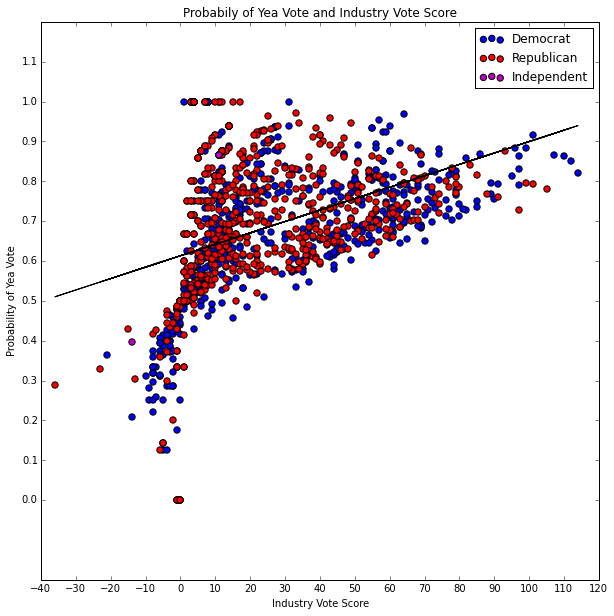

In [266]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

x = all_congress_plot_with_industries['industry_votes_score']
y = all_congress_plot_with_industries['average_yea_vote']

fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='black')
ax.scatter(x, y)


ax.scatter(x=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['industry_votes_score'], 
           y=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['average_yea_vote'],
          c='b', label='Democrat', s=40)
ax.scatter(x=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'R']['industry_votes_score'], 
           y=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'R']['average_yea_vote'],
          c='r', label='Republican', s=40)
ax.scatter(x=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'I']['industry_votes_score'], 
           y=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'I']['average_yea_vote'],
          c='m', label='Independent', s=40)
plt.legend(loc='upper right')
plt.title('Probabily of Yea Vote and Industry Vote Score')
plt.xlabel('Industry Vote Score')
plt.ylabel('Probability of Yea Vote')
plt.xlim(-40, 120)
plt.yticks(np.arange(min(y), max(y)+.2, .1))
plt.xticks(np.arange(min(x) - 4, max(x)+16, 10))
plt.show();

What does this mean?
==

As the probability increases of a congression official voting yes for an this industry increases, so does the yes vote score for this industry.

Since there is a nice relationship, the 'Industry Votes Score' will be used in replace of probability. This will allow us to see, big picture, if campaign contribution are "winning" votes for the industry in question.

What is a good 'Indusry Votes Score'?
==
To be considered a good industry votes score, the score must perform better than predicting everyone would vote yes.

In [349]:
print '''If we predicted everyone voted yes, 
the accuracy for this industry would be {}%%.
The industry votes score must beat that.'''.format(round(sum(sum(bill_votes_sums['yea'])/
                                                         sum(bill_votes_sums['yea']+
                                                             bill_votes_sums['no']+ 
                                                             bill_votes_sums['not voting']))*100, 0))

print '''The first industry votes score to beat that is {}'''.format(round(all_congress_plot_with_industries[
        (all_congress_plot_with_industries['industry_votes_score'] 
         > 70)].sort_values('average_yea_vote')['average_yea_vote'].reset_index(drop=True)[0] * 100))

If we predicted everyone voted yes, 
the accuracy for this industry would be 68.0%%.
The industry votes score must beat that.
The first industry votes score to beat that is 70.0


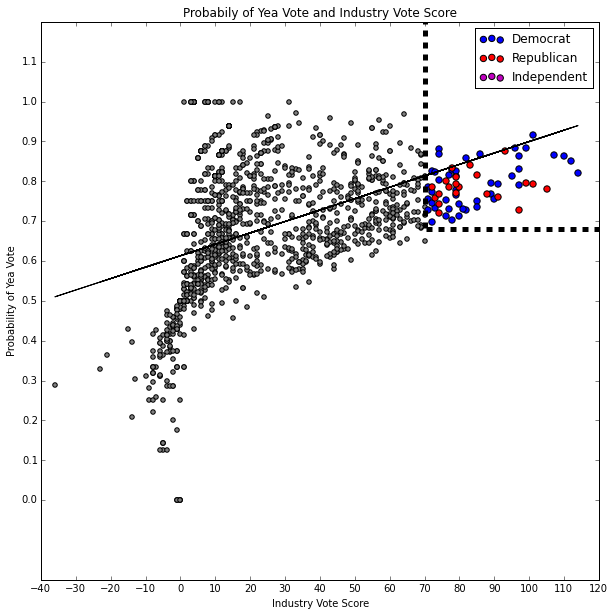

In [338]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

x = all_congress_plot_with_industries['industry_votes_score']
y = all_congress_plot_with_industries['average_yea_vote']

fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='black')

ax.scatter(x, y, c="grey")

ax.scatter(x=all_congress_plot_with_industries[(all_congress_plot_with_industries['party'] == 'D') &
                                              (all_congress_plot_with_industries['industry_votes_score'] > 70)&
                                              (all_congress_plot_with_industries['average_yea_vote'] > .68)]['industry_votes_score'], 
           y=all_congress_plot_with_industries[(all_congress_plot_with_industries['party'] == 'D')&
                                              (all_congress_plot_with_industries['industry_votes_score'] > 70)&
                                              (all_congress_plot_with_industries['average_yea_vote'] > .68)]['average_yea_vote'],
          c='b', label='Democrat', s=40)
ax.scatter(x=all_congress_plot_with_industries[(all_congress_plot_with_industries['party'] == 'R')&
                                              (all_congress_plot_with_industries['industry_votes_score'] > 70) &
                                              (all_congress_plot_with_industries['average_yea_vote'] > .68)]['industry_votes_score'], 
           y=all_congress_plot_with_industries[(all_congress_plot_with_industries['party'] == 'R')&
                                              (all_congress_plot_with_industries['industry_votes_score'] > 70)&
                                              (all_congress_plot_with_industries['average_yea_vote'] > .68)]['average_yea_vote'],
          c='r', label='Republican', s=40)
ax.scatter(x=all_congress_plot_with_industries[(all_congress_plot_with_industries['party'] == 'I')&
                                              (all_congress_plot_with_industries['industry_votes_score'] > 70)&
                                              (all_congress_plot_with_industries['average_yea_vote'] > .68)]['industry_votes_score'], 
           y=all_congress_plot_with_industries[(all_congress_plot_with_industries['party'] == 'I')&
                                              (all_congress_plot_with_industries['industry_votes_score'] > 70)&
                                              (all_congress_plot_with_industries['average_yea_vote'] > .68)]['average_yea_vote'],
          c='m', label='Independent', s=40)
plt.legend(loc='upper right')
plt.title('Probabily of Yea Vote and Industry Vote Score')
plt.xlabel('Industry Vote Score')
plt.ylabel('Probability of Yea Vote')
plt.xlim(-40, 120)
plt.yticks(np.arange(min(y), max(y)+.2, .1))
plt.xticks(np.arange(min(x) - 4, max(x)+16, 10))
plt.axhline(y=.68, xmin=.69, ls='dashed', lw=5, color='black')
plt.axvline(x=70, ymin=.63, ls='dashed', lw=5, color='black')
plt.show();

In other words:
==
**Industry Votes Score tells us how valuable a congressional official is for a given industry. The higher their score, the more yea votes they have contributed to that industry.** 

More yea votes help bill become law!
==

If the Industry Votes Score is greater than 70 then there is a strong likelihood that the official voted yea
==

What is the relationship between the Industry Vote Score, and contributions?
==

Now that we have created this new metric let's see if it differs much from using probability:

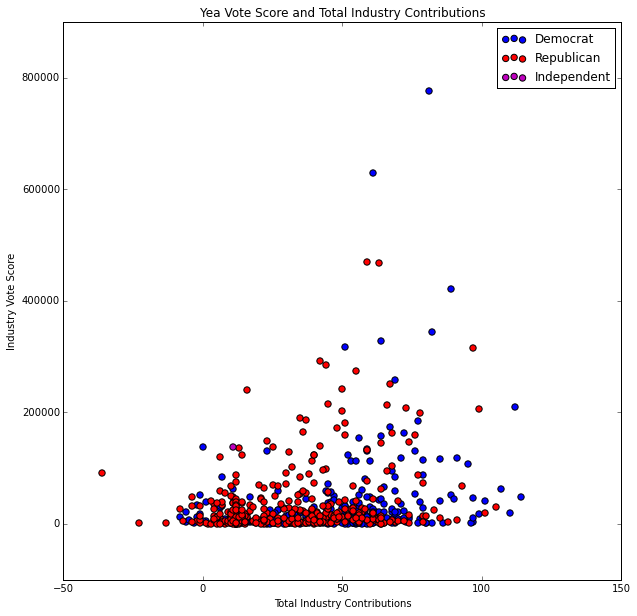

In [171]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

x = all_congress_plot_with_industries['industry_votes_score'] 
y = all_congress_plot_with_industries['MISC DEFENSE']

fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='black')
ax.scatter(x, y)


ax.scatter(x=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['industry_votes_score'], 
           y=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['MISC DEFENSE'],
          c='b', label='Democrat', s=40)
ax.scatter(x=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'R']['industry_votes_score'], 
           y=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'R']['MISC DEFENSE'],
          c='r', label='Republican', s=40)
ax.scatter(x=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'I']['industry_votes_score'], 
           y=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'I']['MISC DEFENSE'],
          c='m', label='Independent', s=40)
plt.legend(loc='upper right')
plt.title('Yea Vote Score and Total Industry Contributions')
plt.xlabel('Total Industry Contributions')
plt.ylabel('Industry Vote Score')
plt.show();

Industry Vote Score is useful!
==
Although the plot is still unable to plot a line of best fit, the industry vote score does a better job seperating the data points, compared to the probability that than an official will vote yea.

How about another metric? 
==
There are multiple Defense industries in the data set ('DEFENSE AEROSPACE', 'DEFENSE ELECTRONICS','FOREIGN & DEFENSE POLICY', 'MISC DEFENSE'). Let's create a feature that is an aggrigate of them.

In [172]:
all_congress_plot_with_industries['all_defense'] = np.sum(all_congress_plot_with_industries[['DEFENSE AEROSPACE', 
                                                                                             'DEFENSE ELECTRONICS',
                                                                                             'FOREIGN & DEFENSE POLICY', 
                                                                                             'MISC DEFENSE']], 1)

probability and industry score might be useful to compare industries on a 3D plane
==

In [451]:
import plotly.plotly as py
import numpy as np
from plotly.graph_objs import *

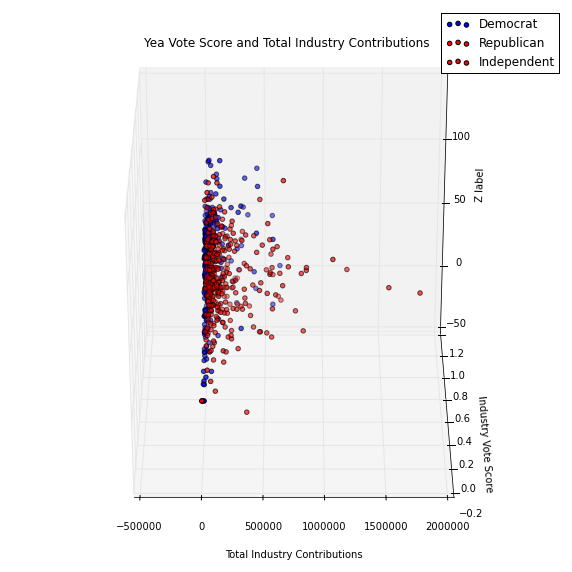

In [453]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

#x = all_congress_plot_with_industries['industry_votes_score'] 
#y = all_congress_plot_with_industries['all_defense']

#fit = np.polyfit(x, y, deg=1)
#ax.plot(x, fit[0] * x + fit[1], color='black')
#ax.scatter(x, y)

xs = all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['OIL & GAS']
ys = all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['average_yea_vote']
zs = all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['industry_votes_score']
ax.scatter(xs, ys, zs, c='blue', label='Democrat')#,size=40)

xs = all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'R']['OIL & GAS']
ys = all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'R']['average_yea_vote']
zs = all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'R']['industry_votes_score']
ax.scatter(xs, ys, zs, c='red', label='Republican')#,size=40)

xs = all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'I']['OIL & GAS']
ys = all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'I']['average_yea_vote']
zs = all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'I']['industry_votes_score']
ax.scatter(xs, ys, zs, c='red', label='Independent')#,size=40)




#ax.scatter(xs = all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['industry_votes_score'], 
 #          ys = all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['all_defense'],
#          c='b', label='Democrat', s=40)
#ax.scatter(x=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'R']['industry_votes_score'], 
#           y=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'R']['all_defense'],
#          c='r', label='Republican', s=40)
#ax.scatter(x=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'I']['industry_votes_score'], 
#           y=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'I']['all_defense'],
#          c='m', label='Independent', s=40)
plt.legend(loc='upper right')
#plt.yticks(np.arange(min(y), max(y)+.2, .1))
#plt.yticks(np.arange(min(y) -4, max(y)+16, 20))
plt.title('Yea Vote Score and Total Industry Contributions')
plt.xlabel('Total Industry Contributions')
ax.set_zlabel('Z label')
plt.ylabel('Industry Vote Score')
ax.view_init(30, 270)
plt.show();

In [464]:
# aquatic colorscale
cls=[[0, 'rgb(0,0,131)'], [0.125, 'rgb(0,60,170)'], [0.375, 'rgb(5,255,255)'], [0.625, 'rgb(255,255,0)'], [0.875, 'rgb(250,0,0)'], [1, 'rgb(128,0,0)']]

data = Data([ Surface( x=x, y=y, z=z, colorscale=cls ) ])

layout = Layout(
    title='waaaaves',
    autosize=True,
    scene=Scene( 
        zaxis=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['OIL & GAS'],
        xaxis=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['average_yea_vote'],   
        yaxis=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['average_yea_vote'],        
        #bgcolor="rgb(244, 244, 248)"
    )
)

fig = Figure(data=data, layout=layout)

#xs = all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['OIL & GAS']
#ys = all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['average_yea_vote']
#zs = all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['average_yea_vote']
#py.scatter(xs, ys, zs, c='blue', label='Democrat')#,size=40)

# As of Plotly's python package plotly-1.5.0
# 2d contours in 3d plots aren't supported, 
# but you can hack them in like this.
# Stayed tuned for updates.
contours = { 'z':{ 'show':True } }
fig['data'][0]['contours'] = contours

# validate = False prevents syntax checking that would complain about the 2d contour hack (see above)
py.iplot(fig, filename='waaaaves', validate=False)

PlotlyDictValueError: 'zaxis' has invalid value inside 'scene'

Path To Error: ['zaxis']

Current path: []
Current parent object_names: []

With the current parents, 'zaxis' can be used as follows:

Under ('figure', 'layout', 'scene'):

    role: object




When contributions reach the millions the Industry Vote Score is pretty strong!
==

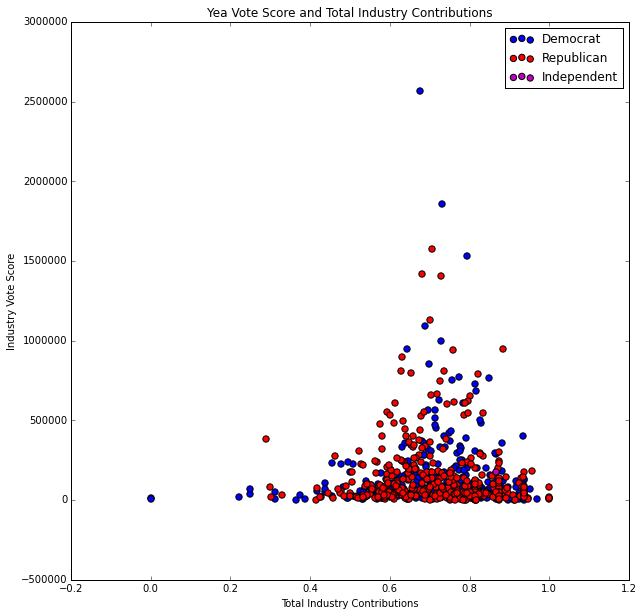

In [356]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

x = all_congress_plot_with_industries['average_yea_vote'] 
y = all_congress_plot_with_industries['all_defense']

fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='black')
ax.scatter(x, y)


ax.scatter(x=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['average_yea_vote'], 
           y=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'D']['all_defense'],
          c='b', label='Democrat', s=40)
ax.scatter(x=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'R']['average_yea_vote'], 
           y=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'R']['all_defense'],
          c='r', label='Republican', s=40)
ax.scatter(x=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'I']['average_yea_vote'], 
           y=all_congress_plot_with_industries[all_congress_plot_with_industries['party'] == 'I']['all_defense'],
          c='m', label='Independent', s=40)
plt.legend(loc='upper right')
plt.title('Yea Vote Score and Total Industry Contributions')
plt.xlabel('Total Industry Contributions')
plt.ylabel('Industry Vote Score')
plt.show();

Testing stuff
==

In [19]:
contributions_test = pd.read_csv('/Users/Alexanderhubbard/Desktop/exports/all_contributions_of_interest.csv')

In [20]:
contributions_test.head(2)

,Unnamed: 0,id,cycle,amount,date,contributor_name,contributor_ext_id,contributor_category,organization_name,organization_ext_id,...,recipient_ext_id,recipient_party,recipient_state,recipient_state_held,district_held,seat,seat_held,seat_status,seat_result,contributor_industry
0,0,208302068,1990,250,3/14/89,"WHITE, JESSE",a0000240172,X7000,True Love Baptist Church,NaN,...,N00003838,D,IN,IN,IN-04,federal:house,federal:house,I,W,CLERGY & RELIGIOUS ORGANIZATIONS
1,1,208317562,1990,200,4/10/89,"REVILLS, APOSTLE",a0001034882,X7000,Pastor,NaN,...,N00002096,D,GA,GA,GA-02,federal:house,federal:house,I,W,CLERGY & RELIGIOUS ORGANIZATIONS


In [21]:
contributions_test['date'][0]

'3/14/89'

In [2]:
con = sqlite3.connect("clean_voting_data.db")
contributions_connnection = con.cursor()

In [16]:
## get column names from a csv's header structure
# import
column_structure = pd.read_csv('/Users/Alexanderhubbard/Desktop/final_porject_data/all_bills/clean_voting_data.csv', nrows=2)
# remove unwanted column
#column_structure = column_structure.drop('Unnamed: 0', 1)
# save an object for column names to call later
column_names = list(column_structure.columns)
# delete the pandas files. There is not other purpose for it
del column_structure

In [17]:
column_names

['Unnamed: 0',
 'bill_id',
 'date',
 'display_name',
 'id',
 'party',
 'state',
 'subjects_top_terms',
 'no',
 'not voting',
 'yea']

In [15]:
# This is the strucutre for quering through you sqlite database
query_text = "SELECT * FROM data LIMIT 10"
contributions_connnection.execute(query_text)
contributions_connnection.fetchall()
#query_results = pd.DataFrame(contributions_connnection.fetchall(), columns=column_names)
#query_results

[(1,
  u'hr2-101',
  u'1989-05-08 00:00:00.000000',
  u'ANDERSON  G',
  u'A000189',
  u'D',
  u'CA',
  u'Labor and employment',
  1,
  0),
 (2,
  u'hr2-101',
  u'1989-05-08 00:00:00.000000',
  u'BARNARD  DO',
  u'B000153',
  u'D',
  u'GA',
  u'Labor and employment',
  1,
  0),
 (3,
  u'hr2-101',
  u'1989-05-08 00:00:00.000000',
  u'BOSCO  DOUG',
  u'B000648',
  u'D',
  u'CA',
  u'Labor and employment',
  1,
  0),
 (4,
  u'hr2-101',
  u'1989-05-08 00:00:00.000000',
  u'FRANK  BARN',
  u'F000339',
  u'D',
  u'MA',
  u'Labor and employment',
  1,
  0),
 (5,
  u'hr2-101',
  u'1989-05-08 00:00:00.000000',
  u'GONZALEZ  H',
  u'G000272',
  u'D',
  u'TX',
  u'Labor and employment',
  1,
  0),
 (6,
  u'hr2-101',
  u'1989-05-08 00:00:00.000000',
  u'QUILLEN  JA',
  u'Q000013',
  u'R',
  u'TN',
  u'Labor and employment',
  1,
  0),
 (7,
  u'hr2-101',
  u'1989-05-08 00:00:00.000000',
  u'ROYBAL  EDW',
  u'R000485',
  u'D',
  u'CA',
  u'Labor and employment',
  1,
  0),
 (8,
  u'hr2-101',
  u'1989

In [26]:
all_vote_info = pd.read_csv('/Users/Alexanderhubbard/Desktop/final_porject_data/all_bills/clean_voting_data.csv')

In [29]:
np.unique(all_vote_info['subjects_top_terms'])

array([nan, 'Agriculture and food', 'Animals',
       'Armed forces and national security', 'Arts, culture, religion',
       'Awards, medals, prizes',
       'Civil rights and liberties, minority issues', 'Commemorations',
       'Commerce', 'Congress', 'Crime and law enforcement',
       'Economics and public finance', 'Education', 'Emergency management',
       'Energy', 'Environmental protection', 'Families',
       'Finance and financial sector',
       'Foreign trade and international finance',
       'Government operations and politics', 'Health',
       'Housing and community development', 'Immigration',
       'International affairs', 'Labor and employment', 'Law', 'Libraries',
       'Mines and mineral resources', 'Native Americans',
       'Private legislation', 'Public lands and natural resources',
       'Public works', 'Science, technology, communications',
       'Social sciences and history', 'Social welfare',
       'Sports and recreation', 'Taxation',
       'Transpor

In [31]:
armed_forces_raw_votes = all_vote_info[all_vote_info['subjects_top_terms'] == 'Armed forces and national security']

In [33]:
armed_forces_raw_votes = armed_forces_raw_votes.reset_index(drop=True)

In [35]:
armed_forces_raw_votes = armed_forces_raw_votes.drop('Unnamed: 0', 1)

In [36]:
armed_forces_raw_votes.to_csv('/Users/Alexanderhubbard/Desktop/armed_forces_raw_votes.csv')